In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import rcParams

In [22]:
# load dataset
dataset = pd.read_csv('train.csv',index_col=None)
dataset = dataset[dataset.columns[[1,2,3,6,7,9,10,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34]]]
dataset = pd.get_dummies(dataset, drop_first=True)

In [23]:
X, y = dataset.drop('Loan Status',axis=1), dataset['Loan Status']

In [24]:
# Synthetic Minority Oversampling Technique 
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

In [25]:
X_sm, y_sm = smote.fit_resample(X, y)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)

In [36]:
%%time
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(colsample_bytree= 0.5,gamma=0.2, learning_rate=0.2,max_depth=6,min_child_weight=3)
xgb_classifier.fit(X_train, y_train)

CPU times: user 15.6 s, sys: 23.8 ms, total: 15.6 s
Wall time: 15.6 s


In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.43 %
Standard Deviation: 0.14 %


In [38]:
y_pred = xgb_classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
labels = ['Not a loan defaulter','A loan defaulter']
print(classification_report(y_test,xgb_classifier.predict(X_test),target_names=labels))

                      precision    recall  f1-score   support

Not a loan defaulter       0.84      0.86      0.85     12205
    A loan defaulter       0.86      0.83      0.85     12284

            accuracy                           0.85     24489
           macro avg       0.85      0.85      0.85     24489
        weighted avg       0.85      0.85      0.85     24489



In [40]:
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(y_test, y_pred)
cn_matrix

array([[10545,  1660],
       [ 2078, 10206]])

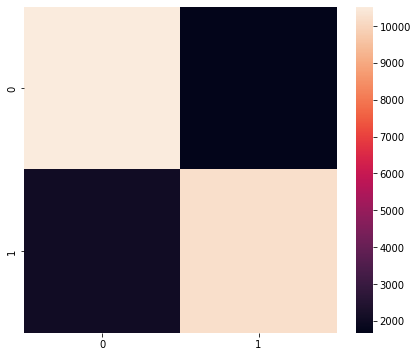

In [33]:
# Confusion matrix XGBClassifier
rcParams['figure.figsize'] = 7, 6
sns.heatmap(cn_matrix, annot=False, cbar=True,fmt='g')
# plt.savefig('XGBClassifier_matrix_v2.svg', dpi=720);
plt.show()